In [ ]:
import pandas as pd
df= pd.read_csv('gym_members_exercise_tracking.csv',sep =',')
df.rename(columns={'Weight (kg)':'Berat'}, inplace=True)
df.rename(columns={'Height (m)':'Tinggi'}, inplace=True)
df.rename(columns={'Age':'Umur'}, inplace=True)
df

,Umur,Gender,Berat,Tinggi,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883,HIIT,28.2,2.1,3,2,37.74


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

x = df[['Umur', 'Tinggi']].to_numpy()
y = df['Berat'].to_numpy()

x = sm.add_constant(x)
model_prediksi = sm.OLS(y,x).fit();
print(model_prediksi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     75.14
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           4.58e-31
Time:                        14:32:20   Log-Likelihood:                -4281.9
No. Observations:                 973   AIC:                             8570.
Df Residuals:                     970   BIC:                             8585.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.6654      8.860     -3.235      0.0

In [ ]:
df1 = pd.read_csv('gym_members_exercise_tracking.csv',sep =',')
# Rename columns to match the training data
df1.rename(columns={'Weight (kg)':'Berat'}, inplace=True) # Assuming 'Weight (kg)' is the actual column name
df1.rename(columns={'Height (m)':'Tinggi'}, inplace=True) # Assuming 'Height (m)' is the actual column name
df1.rename(columns={'Age':'Umur'}, inplace=True) # Assuming 'Age' is the actual column name
x_tes = df1[['Umur','Tinggi']].to_numpy()
y_real = df1['Berat'].to_numpy()
y_nama = df1['Gender'].to_numpy()
x_tes = sm.add_constant(x_tes)
y_pred = model_prediksi.predict(x_tes)

In [ ]:
df = pd.DataFrame()
df["Jenis Kelamin"]=y_nama
df["Berat Real"]=y_real
df["Berat Prediksi"]=y_pred
df["ERROR"]=df["Berat Real"]-df["Berat Prediksi"]
df["PERSEN PREDIKSI"]=1.0-(abs(df["ERROR"])/df["Berat Real"])
df["PERSEN"]=df["PERSEN PREDIKSI"]*100
display(df)

,Jenis Kelamin,Berat Real,Berat Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,Male,88.3,72.303505,15.996495,0.818839,81.883924
1,Female,74.9,61.862394,13.037606,0.825933,82.593316
2,Female,68.1,70.370896,-2.270896,0.966654,96.665352
3,Male,53.2,73.111661,-19.911661,0.625721,62.572066
4,Male,46.1,77.967429,-31.867429,0.308733,30.873256
...,...,...,...,...,...,...
968,Male,87.1,75.578836,11.521164,0.867725,86.772487
969,Male,66.6,67.663114,-1.063114,0.984037,98.403733
970,Female,60.4,75.193680,-14.793680,0.755072,75.507152
971,Male,126.4,80.662596,45.737404,0.638153,63.815345


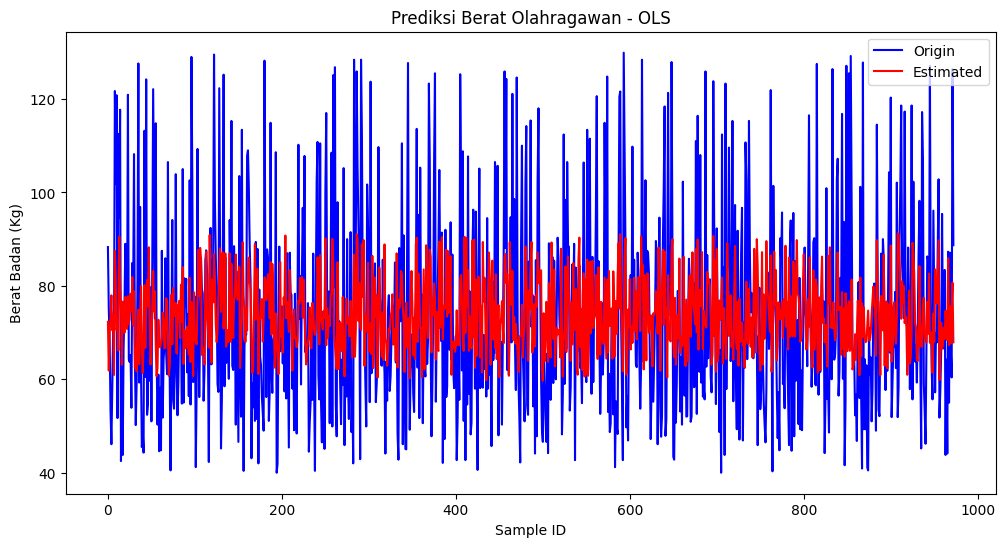

In [ ]:
plt.figure(figsize=(12,6))
# Assuming 'df' is the DataFrame containing the data
x = df.index.values  # Use the index of the DataFrame for the x-axis
plt.plot(x, df["Berat Real"], label="Origin",color="b")
plt.plot(x, df["Berat Prediksi"], label="Estimated",color="r")

plt.legend()
plt.xlabel('Sample ID')
plt.ylabel('Berat Badan (Kg)')
plt.title('Prediksi Berat Olahragawan - OLS')
plt.show()